### Assignment 6: Time Series Modeling

## Learning Objectives

   
  At the end of the experiment, you will be able to understand:
  * Visualize and Understand the first wave of covid-19 using time series data from January 2020 to August 2020.
  * How to make predictions on time series data (Covid-19 data) using SARIMA model    


### Setup Steps:

In [ ]:
#@title Please enter your registration id to start: { run: "auto", display-mode: "form" }
Id = "test_dhai4" #@param {type:"string"}

In [ ]:
#@title Please enter your password (your registered phone number) to continue: { run: "auto", display-mode: "form" }
password = "9811450505" #@param {type:"string"}

In [ ]:
#@title Run this cell to complete the setup for this Notebook
from IPython import get_ipython

ipython = get_ipython()
  
notebook= "DHAI-B3-M3_AST_06_Time_Series_Modeling.ipynb" #name of the notebook

def setup():
#  ipython.magic("sx pip3 install torch")  
    from IPython.display import HTML, display
    display(HTML('<script src="https://dashboard.talentsprint.com/aiml/record_ip.html?traineeId={0}&recordId={1}"></script>'.format(getId(),submission_id)))
    print("Setup completed successfully")
    return

def submit_notebook():
    ipython.magic("notebook -e "+ notebook + ".ipynb")
    
    import requests, json, base64, datetime

    url = "https://dashboard.talentsprint.com/xp/app/save_notebook_attempts"
    if not submission_id:
      data = {"id" : getId(), "notebook" : notebook, "mobile" : getPassword()}
      r = requests.post(url, data = data)
      r = json.loads(r.text)

      if r["status"] == "Success":
          return r["record_id"]
      elif "err" in r:        
        print(r["err"])
        return None        
      else:
        print ("Something is wrong, the notebook will not be submitted for grading")
        return None
    
    elif getAnswer() and getComplexity() and getAdditional() and getConcepts() and getComments() and getMentorSupport():
      f = open(notebook + ".ipynb", "rb")
      file_hash = base64.b64encode(f.read())

      data = {"complexity" : Complexity, "additional" :Additional, 
              "concepts" : Concepts, "record_id" : submission_id, 
              "answer" : Answer, "id" : Id, "file_hash" : file_hash,
              "notebook" : notebook,
              "feedback_experiments_input" : Comments,
              "feedback_mentor_support": Mentor_support}        
      r = requests.post(url, data = data)
      r = json.loads(r.text)
      if "err" in r:        
        print(r["err"])
        return None   
      else:
        print("Your submission is successful.")
        print("Ref Id:", submission_id)
        print("Date of submission: ", r["date"])
        print("Time of submission: ", r["time"])
        print("View your submissions: https://dhai.iisc.talentsprint.com/notebook_submissions")
        #print("For any queries/discrepancies, please connect with mentors through the chat icon in LMS dashboard.")
        return submission_id
    else: submission_id
    

def getAdditional():
  try:
    if not Additional: 
      raise NameError
    else:
      return Additional  
  except NameError:
    print ("Please answer Additional Question")
    return None

def getComplexity():
  try:
    if not Complexity:
      raise NameError
    else:
      return Complexity
  except NameError:
    print ("Please answer Complexity Question")
    return None
  
def getConcepts():
  try:
    if not Concepts:
      raise NameError
    else:
      return Concepts
  except NameError:
    print ("Please answer Concepts Question")
    return None
  
  
# def getWalkthrough():
#   try:
#     if not Walkthrough:
#       raise NameError
#     else:
#       return Walkthrough
#   except NameError:
#     print ("Please answer Walkthrough Question")
#     return None
  
def getComments():
  try:
    if not Comments:
      raise NameError
    else:
      return Comments
  except NameError:
    print ("Please answer Comments Question")
    return None
  

def getMentorSupport():
  try:
    if not Mentor_support:
      raise NameError
    else:
      return Mentor_support
  except NameError:
    print ("Please answer Mentor support Question")
    return None

def getAnswer():
  try:
    if not Answer:
      raise NameError 
    else: 
      return Answer
  except NameError:
    print ("Please answer Question")
    return None
  

def getId():
  try: 
    return Id if Id else None
  except NameError:
    return None

def getPassword():
  try:
    return password if password else None
  except NameError:
    return None

submission_id = None
### Setup 
if getPassword() and getId():
  submission_id = submit_notebook()
  if submission_id:
    setup() 
else:
  print ("Please complete Id and Password cells before running setup")



Setup completed successfully


### Problem Statement

The novel Coronavirus (Covid-19) has spread around the world very rapidly and the worst-affected were China (the source of the virus), US, India Italy, Iran, and many more.

Objective of this notebook is to study COVID-19 outbreak with the help of some basic visualizations techniques. Comparison of China where the COVID-19 originally originated from with the Rest of the World. Perform predictions and Time Series forecasting in order to study the impact and spread of the COVID-19 during 1st wave(in 2020).

### Data Description

Time series data captures a series of data points recorded at (usually) regular intervals. Some common examples include daily weather temperature, stock prices, and the number of sales a company makes.

The data is provided by the Johns Hopkins University Center for Systems Science and Engineering (JHU CSSE) and contains the number of reported daily cases by country.

The data attributes that are available in the dataset are:
1. Serial Number
2. Observation Date
3. Province/State
4. Country/Region
5. Confirmed 
6. Deaths
7. Recovered



### Importing required Python Packages and Libraries

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np
import datetime as dt
from datetime import datetime, timedelta
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
import statsmodels.api as sm

Loading the data and observing the inital few values from the dataset.

In [ ]:
covid_data = pd.read_csv("/content/covid_19_data.csv")
covid_data.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


Now, let us look at the shape, data types, and the null values in the dataset.

In [ ]:
print("Size/Shape of the dataset: ",covid_data.shape)
print("Checking for null values:\n",covid_data.isnull().sum())
print("Checking Data-type of each column:\n",covid_data.dtypes)

Size/Shape of the dataset:  (98252, 8)
Checking for null values:
 SNo                    0
ObservationDate        0
Province/State     31153
Country/Region         0
Last Update            0
Confirmed              0
Deaths                 0
Recovered              0
dtype: int64
Checking Data-type of each column:
 SNo                  int64
ObservationDate     object
Province/State      object
Country/Region      object
Last Update         object
Confirmed          float64
Deaths             float64
Recovered          float64
dtype: object


Here, we can observe that Province/State has 31153 null values. Since, we will not be using 'Province/State' for any analysis or forecasting, we will drop that column.

In [ ]:
# Dropping column as SNo is of no use, and "Province/State" contains too many missing values.
covid_data.drop(["SNo"],1,inplace=True)

Further, let us convert "Observation Date" into Datetime format.

In [ ]:
covid_data["ObservationDate"]=pd.to_datetime(covid_data["ObservationDate"])

Let us group the data country wise that will help in further data analysis.

In [ ]:
grouped_country=covid_data.groupby(["Country/Region","ObservationDate"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})

Now, let us calculate the data of active cases.

In [ ]:
grouped_country["Active Cases"]=grouped_country["Confirmed"]-grouped_country["Recovered"]-grouped_country["Deaths"]
#grouped_country["log_confirmed"]=np.log(grouped_country["Confirmed"])
#grouped_country["log_active"]=np.log(grouped_country["Active Cases"])

In [ ]:
# Grouping different types of cases as per the date
datewise=covid_data.groupby(["ObservationDate"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})
datewise["Days Since"]=datewise.index-datewise.index.min()

In [ ]:
print("Basic Information")
print("Totol number of countries with Disease Spread: ",len(covid_data["Country/Region"].unique()))
print("Total number of Confirmed Cases around the World: ",datewise["Confirmed"].iloc[-1])
print("Total number of Recovered Cases around the World: ",datewise["Recovered"].iloc[-1])
print("Total number of Deaths Cases around the World: ",datewise["Deaths"].iloc[-1])
print("Total number of Active Cases around the World: ",(datewise["Confirmed"].iloc[-1]-datewise["Recovered"].iloc[-1]-datewise["Deaths"].iloc[-1]))
print("Total number of Closed Cases around the World: ",datewise["Recovered"].iloc[-1]+datewise["Deaths"].iloc[-1])
print("Approximate number of Confirmed Cases per Day around the World: ",np.round(datewise["Confirmed"].iloc[-1]/datewise.shape[0]))
print("Approximate number of Recovered Cases per Day around the World: ",np.round(datewise["Recovered"].iloc[-1]/datewise.shape[0]))
print("Approximate number of Death Cases per Day around the World: ",np.round(datewise["Deaths"].iloc[-1]/datewise.shape[0]))
print("Approximate number of Confirmed Cases per hour around the World: ",np.round(datewise["Confirmed"].iloc[-1]/((datewise.shape[0])*24)))
print("Approximate number of Recovered Cases per hour around the World: ",np.round(datewise["Recovered"].iloc[-1]/((datewise.shape[0])*24)))
print("Approximate number of Death Cases per hour around the World: ",np.round(datewise["Deaths"].iloc[-1]/((datewise.shape[0])*24)))

Basic Information
Totol number of countries with Disease Spread:  223
Total number of Confirmed Cases around the World:  24996456.0
Total number of Recovered Cases around the World:  16409757.0
Total number of Deaths Cases around the World:  842499.0
Total number of Active Cases around the World:  7744200.0
Total number of Closed Cases around the World:  17252256.0
Approximate number of Confirmed Cases per Day around the World:  113106.0
Approximate number of Recovered Cases per Day around the World:  74252.0
Approximate number of Death Cases per Day around the World:  3812.0
Approximate number of Confirmed Cases per hour around the World:  4713.0
Approximate number of Recovered Cases per hour around the World:  3094.0
Approximate number of Death Cases per hour around the World:  159.0


### Data Visualization

By now, we have a basic idea about the total number of cases confirmed, recovered, and the deaths. Further, let us visualize the data to understand the trend of spreading the disease.

In [ ]:
fig=px.bar(x=datewise.index,y=datewise["Confirmed"]-datewise["Recovered"]-datewise["Deaths"])
fig.update_layout(title="Distribution of Number of Active Cases",
                  xaxis_title="Date",yaxis_title="Number of Cases",)
fig.show()

Active Cases = Number of Confirmed Cases - Number of Recovered Cases - Number of Death Cases.

**Observation** : Increase in number of Active Cases is probably an indication of Recovered case or Death case number is dropping in comparison to number of Confirmed Cases drastically.

In [ ]:
fig=px.bar(x=datewise.index,y=datewise["Recovered"]+datewise["Deaths"])
fig.update_layout(title="Distribution of Number of Closed Cases",
                  xaxis_title="Date",yaxis_title="Number of Cases")
fig.show()

Closed Cases = Number of Recovered Cases + Number of Death Cases

**Observation** : Increase in number of Closed classes imply either more patients are getting recovered from the disease or more pepole are dying because of COVID-19

Now, as we have grouped different cases as per the date, let us create the datewise dataframe with a new column week of the year.

In [ ]:
datewise["WeekOfYear"]=datewise.index.weekofyear

In [ ]:
datewise.head()

,Confirmed,Recovered,Deaths,Days Since,WeekOfYear
ObservationDate,,,,,
2020-01-22,555.0,28.0,17.0,0 days,4
2020-01-23,653.0,30.0,18.0,1 days,4
2020-01-24,941.0,36.0,26.0,2 days,4
2020-01-25,1438.0,39.0,42.0,3 days,4
2020-01-26,2118.0,52.0,56.0,4 days,4


So, in the datewise dataframe, instead of having total number of confirmed, recovered, and death cases, we have the number of increased cases on a specific day.

Now, let us have some basic information about the disease spread and the number of cases.

Moreover, let us analyze the growth rate of Confirmed, Recovered and Death Cases.

In [ ]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=datewise.index, y=datewise["Confirmed"],
                    mode='lines+markers',
                    name='Confirmed Cases'))
fig.add_trace(go.Scatter(x=datewise.index, y=datewise["Recovered"],
                    mode='lines+markers',
                    name='Recovered Cases'))
fig.add_trace(go.Scatter(x=datewise.index, y=datewise["Deaths"],
                    mode='lines+markers',
                    name='Death Cases'))
fig.update_layout(title="Growth of different types of cases",
                 xaxis_title="Date",yaxis_title="Number of Cases",legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

From the above visualization, we can understand the trend for the growth rate of different cases. We can observe that the growth rate of death cases are very less when compared to the confirmed and recovered cases.

#### Countrywise Analysis

Let us visualize the data for top 15 countries for confirmed and death cases to know the worst impacted country.

In [ ]:
#Calculating countrywise Moratality and Recovery Rate
countrywise=covid_data[covid_data["ObservationDate"]==covid_data["ObservationDate"].max()].groupby(["Country/Region"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'}).sort_values(["Confirmed"],ascending=False)
countrywise["Mortality"]=(countrywise["Deaths"]/countrywise["Confirmed"])*100
countrywise["Recovery"]=(countrywise["Recovered"]/countrywise["Confirmed"])*100

Text(0.5, 1.0, 'Top 15 countries as per Number of Death Cases')

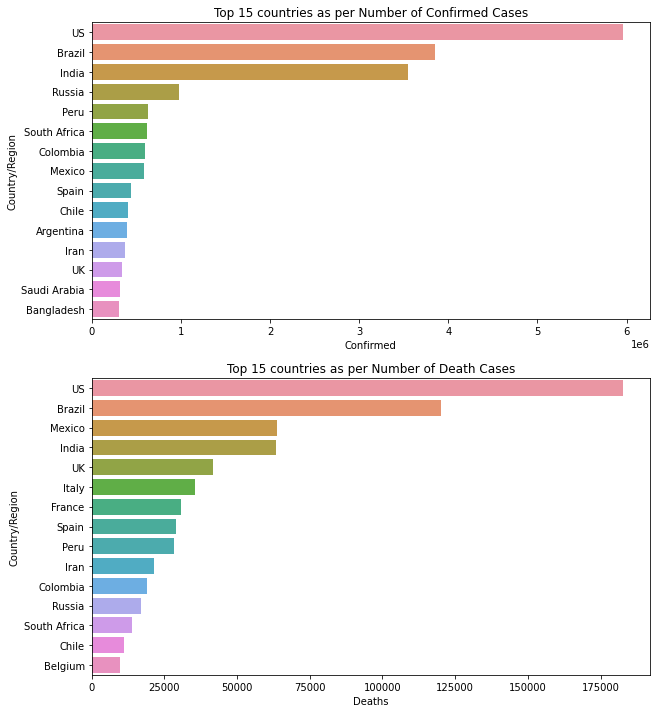

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1,figsize=(10,12))
top_15_confirmed=countrywise.sort_values(["Confirmed"],ascending=False).head(15)
top_15_deaths=countrywise.sort_values(["Deaths"],ascending=False).head(15)
sns.barplot(x=top_15_confirmed["Confirmed"],y=top_15_confirmed.index,ax=ax1)
ax1.set_title("Top 15 countries as per Number of Confirmed Cases")
sns.barplot(x=top_15_deaths["Deaths"],y=top_15_deaths.index,ax=ax2)
ax2.set_title("Top 15 countries as per Number of Death Cases")

In the above plot, we can observe that US, Brazil, Mexico, and India were worst affected with more that 50,000 deaths.

#### Data Analysis for India

Now, let us understand the trend for covid-19 cases in india.


In [ ]:
india_data = covid_data[covid_data["Country/Region"]=="India"]
datewise_india = india_data.groupby(["ObservationDate"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})
print(datewise_india.iloc[-1])
print("Total Active Cases: ",datewise_india["Confirmed"].iloc[-1]-datewise_india["Recovered"].iloc[-1]-datewise_india["Deaths"].iloc[-1])
print("Total Closed Cases: ",datewise_india["Recovered"].iloc[-1]+datewise_india["Deaths"].iloc[-1])

Confirmed    3542733.0
Recovered    2713933.0
Deaths         63498.0
Name: 2020-08-29 00:00:00, dtype: float64
Total Active Cases:  765302.0
Total Closed Cases:  2777431.0


In [ ]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=datewise_india.index, y=datewise_india["Confirmed"].diff().fillna(0),
                    mode='lines+markers',
                    name='Confirmed Cases'))
fig.add_trace(go.Scatter(x=datewise_india.index, y=datewise_india["Recovered"].diff().fillna(0),
                    mode='lines+markers',
                    name='Recovered Cases'))
fig.add_trace(go.Scatter(x=datewise_india.index, y=datewise_india["Deaths"].diff().fillna(0),
                    mode='lines+markers',
                    name='Death Cases'))
fig.update_layout(title="Daily increase in different types of cases in India",
                 xaxis_title="Date",yaxis_title="Number of Cases",legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

From the above plot we can observe that the peak of covid-19 was in August and the number of recoveries also dropped. 

### Prediction of future cases using Linear Regression and SARIMA model.

#### **Linear Regression**

Before knowing what is linear regression, let us get ourselves accustomed to regression. Regression is a method of modelling a target value based on independent predictors. This method is mostly used for forecasting and finding out cause and effect relationship between variables. Regression techniques mostly differ based on the number of independent variables and the type of relationship between the independent and dependent variables.

Simple linear regression is a type of regression analysis where the number of independent variables is one and there is a linear relationship between the independent(x) and dependent(y) variable. The red line in the above graph is referred to as the best fit straight line. Based on the given data points, we try to plot a line that models the points the best. The line can be modelled based on the linear equation shown below.

`y = a_0 + a_1 * x`   

The motive of the linear regression algorithm is to find the best values for a_0 and a_1. Before moving on to the algorithm, let’s have a look at two important concepts you must know to better understand linear regression.

#### Implementing Linear Regression using Scikit learn

1. Create an object of Linear Regression function
  
  *lr = LinearRegression()*

2. Fit the training data(features, dependent variable) using the `fit` method from sklearn.linear_model

  *fit(X_train, y_train)*

3. `Predict` the results using the test data that serves as unknown features to the linear regression model.

  *y_pred = lr.predict(X_test)*

4. Find the `Root Mean Square Error` i.e. the difference between the predicted value and the test set value.

  *rmse(y_test,y_pred)*

5. Finally, find the `R2 Score` for y_test and y_pred that depicts the accuracy score of the model built.

  *r2_score(y_test,y_pred)*

If you want to learn more about sklearn Linear Regression, click 
[here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

In [ ]:
datewise["Days Since"]=datewise.index-datewise.index[0]
datewise["Days Since"]=datewise["Days Since"].dt.days

#### Splitting the dataset

In [ ]:
train_ml=datewise.iloc[:int(datewise.shape[0]*0.95)]
valid_ml=datewise.iloc[int(datewise.shape[0]*0.95):]
model_scores=[]

#### Creating the model and fitting it to the training set.

In [ ]:
lin_reg=LinearRegression(normalize=True)

In [ ]:
lin_reg.fit(np.array(train_ml["Days Since"]).reshape(-1,1),np.array(train_ml["Confirmed"]).reshape(-1,1))

LinearRegression(normalize=True)

#### Making Predictions

In [ ]:
prediction_valid_linreg=lin_reg.predict(np.array(valid_ml["Days Since"]).reshape(-1,1))

Now, let us evaluate our model using RMSE(Root Mean Squares Error.)

In [ ]:
model_scores.append(np.sqrt(mean_squared_error(valid_ml["Confirmed"],prediction_valid_linreg)))
print("Root Mean Square Error for Linear Regression: ",np.sqrt(mean_squared_error(valid_ml["Confirmed"],prediction_valid_linreg)))

Root Mean Square Error for Linear Regression:  6783550.068817429


Lower RMSE value indicates that the model has performed well. But, the RMSE value for Linear regression is very high that indicates that for time series forecasting, Linear Regression is not a best algorithm.

In [ ]:
plt.figure(figsize=(11,6))
prediction_linreg=lin_reg.predict(np.array(datewise["Days Since"]).reshape(-1,1))
linreg_output=[]
for i in range(prediction_linreg.shape[0]):
    linreg_output.append(prediction_linreg[i][0])

fig=go.Figure()
fig.add_trace(go.Scatter(x=datewise.index, y=datewise["Confirmed"],
                    mode='lines+markers',name="Train Data for Confirmed Cases"))
fig.add_trace(go.Scatter(x=datewise.index, y=linreg_output,
                    mode='lines',name="Linear Regression Best Fit Line",
                    line=dict(color='black', dash='dot')))
fig.update_layout(title="Confirmed Cases Linear Regression Prediction",
                 xaxis_title="Date",yaxis_title="Confirmed Cases",legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

<Figure size 792x432 with 0 Axes>

From the above plot for the prediction of confirmed cases using Linear Regression, we can observe that predictions of Linear Regression are nowhere close to the actual values. Therefore, we can conclude that Linear Regression will not prove to be useful for time series forecasting.

Another reason for Linear Regression to not perform well is **heteroscedasticity**. Heteroscedasticity means unequal scatter. Specifically, heteroscedasticity is a systematic change in the spread of the residuals over the range of measured values. In time series data, as the time increases, the data also increases and scatters in such a manner that it becomes difficult to forecast the future values.




#### **ARIMA Model for time series forecasting** 

Autoregressive Integrated Moving Average, or ARIMA, is one of the most widely used forecasting methods for univariate time series data forecasting. Although the method can handle data with a trend, it does not support time series with a seasonal component. An extension to ARIMA that supports the direct modeling of the seasonal component of the series is called SARIMA.

A problem with ARIMA is that it does not support seasonal data. That is a time series with a repeating cycle.

ARIMA expects data that is either not seasonal or has the seasonal component removed, e.g. seasonally adjusted via methods such as seasonal differencing. This is where SARIMA is used for time series forecasting.

#### **What is SARIMA model?**

Seasonal Autoregressive Integrated Moving Average, SARIMA or Seasonal ARIMA, is an extension of ARIMA that explicitly supports univariate time series data with a seasonal component.

It adds three new hyperparameters to specify the autoregression (AR), differencing (I) and moving average (MA) for the seasonal component of the series, as well as an additional parameter for the period of the seasonality.

#### **How to Configure SARIMA?**

Configuring a SARIMA requires selecting hyperparameters for both the trend and seasonal elements of the series.

**Trend Elements**

There are three trend elements that require configuration.

They are the same as the ARIMA model; specifically:

p: Trend autoregression order.

d: Trend difference order.

q: Trend moving average order.

**Seasonal Elements**

There are four seasonal elements that are not part of ARIMA that must be configured; they are:

P: Seasonal autoregressive order.

D: Seasonal difference order.

Q: Seasonal moving average order.

m: The number of time steps for a single seasonal period.

Together, the notation for an SARIMA model is specified as:

    SARIMA(p,d,q)(P,D,Q)m

Where the specifically chosen hyperparameters for a model are specified; for example:

    SARIMA(3,1,0)(1,1,0)12

Importantly, the m parameter influences the P, D, and Q parameters. For example, an m of 12 for monthly data suggests a yearly seasonal cycle.

A P=1 would make use of the first seasonally offset observation in the model, e.g. t-(m*1) or t-12. A P=2, would use the last two seasonally offset observations t-(m * 1), t-(m * 2).

Similarly, a D of 1 would calculate a first order seasonal difference and a Q=1 would use a first order errors in the model (e.g. moving average).

Further, for implementing SARIMA model we will be using the `auto_arima()` function from the pmdarima package, we can perform a parameter search for the optimal values of the model.


In [ ]:
pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Importing auto_arima from pmdarima.

In [ ]:
from pmdarima import auto_arima

#### Splitting the dataset

Here, we will be diving the data into train(95%) and validation set(5%).

In [ ]:
model_train = datewise.iloc[:int(datewise.shape[0]*0.95)]
valid = datewise.iloc[int(datewise.shape[0]*0.95):]
y_pred = valid.copy()

#### Model Creation

Creating the SARIMA model and fitting it training data for "Confirmed" covid cases.

In [ ]:
model_sarima= auto_arima(model_train["Confirmed"],trace=True, error_action='ignore', 
                         start_p=0,start_q=0,max_p=2,max_q=2,m=7,
                   suppress_warnings=True,stepwise=True,seasonal=True)
model_sarima.fit(model_train["Confirmed"])

Performing stepwise search to minimize aic
 ARIMA(0,2,0)(1,0,1)[7]             : AIC=4639.367, Time=0.53 sec
 ARIMA(0,2,0)(0,0,0)[7]             : AIC=4675.407, Time=0.02 sec
 ARIMA(1,2,0)(1,0,0)[7]             : AIC=4581.744, Time=0.10 sec
 ARIMA(0,2,1)(0,0,1)[7]             : AIC=4625.152, Time=0.12 sec
 ARIMA(1,2,0)(0,0,0)[7]             : AIC=4657.918, Time=0.02 sec
 ARIMA(1,2,0)(2,0,0)[7]             : AIC=4573.889, Time=0.26 sec
 ARIMA(1,2,0)(2,0,1)[7]             : AIC=4569.802, Time=0.61 sec
 ARIMA(1,2,0)(1,0,1)[7]             : AIC=4567.830, Time=0.38 sec
 ARIMA(1,2,0)(0,0,1)[7]             : AIC=4623.778, Time=0.11 sec
 ARIMA(1,2,0)(1,0,2)[7]             : AIC=4569.794, Time=0.52 sec
 ARIMA(1,2,0)(0,0,2)[7]             : AIC=4600.831, Time=0.22 sec
 ARIMA(1,2,0)(2,0,2)[7]             : AIC=inf, Time=3.14 sec
 ARIMA(2,2,0)(1,0,1)[7]             : AIC=4566.356, Time=1.00 sec
 ARIMA(2,2,0)(0,0,1)[7]             : AIC=4623.780, Time=0.42 sec
 ARIMA(2,2,0)(1,0,0)[7]             : 

ARIMA(order=(1, 2, 1), scoring_args={}, seasonal_order=(1, 0, 1, 7),
      suppress_warnings=True, with_intercept=False)

#### Models Prediction

In [ ]:
prediction_sarima=model_sarima.predict(len(valid))
y_pred["SARIMA Model Prediction"]=prediction_sarima

In [ ]:
model_scores=[]

Further, let us use some metrics i.e. RMSE(Root Mean Sqaure Error) to evaluate models performance.

In [ ]:
model_scores.append(np.sqrt(mean_squared_error(y_pred["Confirmed"],y_pred["SARIMA Model Prediction"])))
print("Root Mean Square Error for SARIMA Model: ",np.sqrt(mean_squared_error(y_pred["Confirmed"],y_pred["SARIMA Model Prediction"])))

Root Mean Square Error for SARIMA Model:  11400.271983521003


Here, the RMSE value for the SARIMA models is 11400. Since, there were more than 2.4 million cases worldwide, therefore, value of 16403 is a very small error value. 

Further, let us have a glance at the visualization of the predicted values with the help of a plot.

In [ ]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=model_train.index, y=model_train["Confirmed"],
                    mode='lines+markers',name="Train Data for Confirmed Cases"))
fig.add_trace(go.Scatter(x=valid.index, y=valid["Confirmed"],
                    mode='lines+markers',name="Validation Data for Confirmed Cases",))
fig.add_trace(go.Scatter(x=valid.index, y=y_pred["SARIMA Model Prediction"],
                    mode='lines+markers',name="Prediction for Confirmed Cases",))
fig.update_layout(title="Confirmed Cases SARIMA Model Prediction",
                 xaxis_title="Date",yaxis_title="Confirmed Cases",legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

Finally, let us have a look at predictions dataframe and observe the values.

In [ ]:
y_pred

,Confirmed,Recovered,Days Since,WeekOfYear,SARIMA Model Prediction
ObservationDate,,,,,
2020-08-18,22137926.0,14116451.0,209,34,2.212671e+07
2020-08-19,22411300.0,14333914.0,210,34,2.240684e+07
2020-08-20,22678483.0,14541573.0,211,34,2.267929e+07
2020-08-21,22949234.0,14712252.0,212,34,2.296429e+07
2020-08-22,23203532.0,14911319.0,213,34,2.321368e+07
2020-08-23,23420418.0,15137203.0,214,34,2.343061e+07
2020-08-24,23647377.0,15337252.0,215,35,2.364515e+07
2020-08-25,23889150.0,15570191.0,216,35,2.388861e+07
2020-08-26,24176836.0,15794441.0,217,35,2.416794e+07


The actual and the predicted values are given in the above table for the confirmed covid-cases. So, if we look for 18-08-2020, then there is a difference of 13000(approx) cases all over the world. For, 29-08-2020, the difference between the actual and the predicted confirmed cases is 35000(approx). 

### Please answer the questions below to complete the experiment:




In [ ]:
# @title Q.1. { run: "auto", form-width: "500px", display-mode: "form" }
Answer = "" #@param ["","0.383","0.3421", "0.131"]

In [ ]:
#@title How was the experiment? { run: "auto", form-width: "500px", display-mode: "form" }
Complexity = "" #@param ["","Too Simple, I am wasting time", "Good, But Not Challenging for me", "Good and Challenging for me", "Was Tough, but I did it", "Too Difficult for me"]


In [ ]:
#@title If it was too easy, what more would you have liked to be added? If it was very difficult, what would you have liked to have been removed? { run: "auto", display-mode: "form" }
Additional = "" #@param {type:"string"}


In [ ]:
#@title Can you identify the concepts from the lecture which this experiment covered? { run: "auto", vertical-output: true, display-mode: "form" }
Concepts = "" #@param ["","Yes", "No"]


In [ ]:
#@title  Text and image description/explanation and code comments within the experiment: { run: "auto", vertical-output: true, display-mode: "form" }
Comments = "" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [ ]:
#@title Mentor Support: { run: "auto", vertical-output: true, display-mode: "form" }
Mentor_support = "" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [ ]:
#@title Run this cell to submit your notebook for grading { vertical-output: true }
try:
  if submission_id:
      return_id = submit_notebook()
      if return_id : submission_id = return_id
  else:
      print("Please complete the setup first.")
except NameError:
  print ("Please complete the setup first.")